In [200]:

# importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [201]:
#Creamos un dataframe por cada hoja del archivo excel
df2020 = pd.read_excel('gastos_costos_20_23.xlsx', sheet_name='2020')
df2021 = pd.read_excel('gastos_costos_20_23.xlsx', sheet_name='2021')
df2022 = pd.read_excel('gastos_costos_20_23.xlsx', sheet_name='2022')
df2023 = pd.read_excel('gastos_costos_20_23.xlsx', sheet_name='2023')

# Tratamiento de datos nulos

In [202]:
df2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   GASTO        840 non-null    object        
 7   DESCRIPCION  3342 non-null   object        
 8   TC           2951 non-null   float64       
 9   IMPORTE      3308 non-null   float64       
 10  IVA          3074 non-null   float64       
 11  RET ISR      3342 non-null   float64       
 12  RET IVA      3342 non-null   float64       
 13  TOTAL MX     3342 non-null   float64       
 14  TOTAL SAT    3342 non-null   float64       
 15  TIPO         3341 non-null   object        
 16  STATUS

In [203]:
df2020.head(10)

,FECHA,FOLIO,UUID,RFC,PROVEEDOR,TIPO GASTO,GASTO,DESCRIPCION,TC,IMPORTE,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,TIPO,STATUS,POLIZA,Columna1
0,2020-01-01,39408,BD20F436-72CC-4BE2-AD37-5999D71AA391,ARE080115PBA,ARSI RENTA SA DE CV,MAQUINARIA,NaN,"Descripción: REVOLVEDORA, Modelo: ULTRAMP9A, M...",1.0,0.00,2248.28,0.0,0.0,2248.28,16300.00,I,Vigente,NaN,14051.72
1,2020-01-01,0001010100750847116902,85AEAC2E-6395-44A0-9CB9-754D06893375,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,490.00,78.40,0.0,0.0,568.40,568.40,I,Vigente,NaN,0.00
2,2020-01-01,0001010100752163714102,BD0DFE85-D776-41CB-9C5C-4FA7923E687A,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,NaN,COMISION COBRADA,1.0,195.00,31.20,0.0,0.0,226.20,226.20,I,Vigente,NaN,0.00
3,2020-01-01,3663,EF4504D6-830D-415C-AF03-80CF54C5E28E,PSS120625C86,PROMOTORA DE SERVICIOS Y SOLUCIONES EMPRESARIA...,HONORARIOS CONTABLES,NaN,HONORARIOS CONTABLES\nDEL MES DE ENERO DEL 2020.,1.0,10694.25,1711.08,0.0,0.0,12405.33,12405.33,I,Vigente,NaN,0.00
4,2020-01-01,2849,EC2F4AA4-BA64-4E2E-A5B7-4EBBE042D6D3,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,1.0,0.00,NaN,0.0,0.0,0.00,0.00,P,Vigente,NaN,0.00
5,2020-01-01,2860,F76E5BAB-1185-472D-A4FB-2A71115DF60A,ENA7006081P0,ELECTROTERMICA NACIONAL SA DE CV,COMPRAS,NaN,Pago,1.0,0.00,NaN,0.0,0.0,0.00,0.00,P,Vigente,NaN,0.00
6,2020-01-01,944,FCB00679-F8D9-4890-9E8B-C2F6B10EB88E,GIC9001301A6,GRUPO INDUSTRIAL CASILLAS SA DE CV,MAQUILAS GIC,NaN,MAQUILA,1.0,32068.97,5131.03,0.0,0.0,37200.00,37200.00,I,Vigente,NaN,0.00
7,2020-01-01,945,C0CA7FD7-66E9-4E76-BCAB-F359F1F8528D,GIC9001301A6,GRUPO INDUSTRIAL CASILLAS SA DE CV,MAQUILAS GIC,NaN,MAQUILA,1.0,8620.69,1379.31,0.0,0.0,10000.00,10000.00,I,Vigente,PE07-ENE20,0.00
8,2020-01-01,22019120028311,3AF035FC-435F-DD4C-9663-6369E2DB8CA9,IFO9409288P6,"INTERCAM FONDOS, S.A. DE C.V. SOCIEDAD OPERADO...",COMISION BANCARIA,NaN,Comisiones y Otros Cargos,1.0,0.01,NaN,0.0,0.0,0.01,0.00,I,Vigente,NaN,-0.01
9,2020-01-01,529,9CB543C7-1AE6-4F42-8CC5-28509B6B09A3,MECM7303141S8,MARISOL MENDOZA CHAVEZ,COMPRAS,NaN,Pago,1.0,0.00,NaN,0.0,0.0,0.00,0.00,P,Vigente,NaN,0.00


In [204]:
#creamos una funcion que calclule el porcentaje de datos nulos por columna, y borre aquellas con un porcentaje superior al 70%
def porcentaje_nulos(df):
    for i in df:
        if df[i].isnull().sum()/df.shape[0] > 0.7:
            df.drop(i, axis=1, inplace=True)
    return df


In [205]:
new2020 = porcentaje_nulos(df2020)
new2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3342 entries, 0 to 3341
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        3342 non-null   datetime64[ns]
 1   FOLIO        3153 non-null   object        
 2   UUID         3342 non-null   object        
 3   RFC          3342 non-null   object        
 4   PROVEEDOR    3342 non-null   object        
 5   TIPO GASTO   3342 non-null   object        
 6   DESCRIPCION  3342 non-null   object        
 7   TC           2951 non-null   float64       
 8   IMPORTE      3308 non-null   float64       
 9   IVA          3074 non-null   float64       
 10  RET ISR      3342 non-null   float64       
 11  RET IVA      3342 non-null   float64       
 12  TOTAL MX     3342 non-null   float64       
 13  TOTAL SAT    3342 non-null   float64       
 14  TIPO         3341 non-null   object        
 15  STATUS       3342 non-null   object        
 16  Column

In [206]:
new2020.isnull().sum()

FECHA            0
FOLIO          189
UUID             0
RFC              0
PROVEEDOR        0
TIPO GASTO       0
DESCRIPCION      0
TC             391
IMPORTE         34
IVA            268
RET ISR          0
RET IVA          0
TOTAL MX         0
TOTAL SAT        0
TIPO             1
STATUS           0
Columna1         0
dtype: int64

In [207]:
#Creamos una funcion que por cada columna numerica con datos nulos, los rellene con la mediana entera de la columna
def rellenar_nulos(df):
    for i in df:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            df[i].fillna(df[i].median(), inplace=True)
    
    df.dropna(inplace = True)
    return df





In [208]:
new2020 = rellenar_nulos(new2020)
new2020.isnull().sum()


C:\Users\tajin\AppData\Local\Temp\ipykernel_4152\4199276219.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
C:\Users\tajin\AppData\Local\Temp\ipykernel_4152\4199276219.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

FECHA          0
FOLIO          0
UUID           0
RFC            0
PROVEEDOR      0
TIPO GASTO     0
DESCRIPCION    0
TC             0
IMPORTE        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
TIPO           0
STATUS         0
Columna1       0
dtype: int64

In [209]:
#Hacemos una funcion que itere las funciones rellena_nulos, y porcentaje_nulos, por cada df en una lista dada
def nulos(df):
    g = porcentaje_nulos(df)
    h = rellenar_nulos(g)
    return h

In [210]:
new2020 = nulos(df2020)
new2021 = nulos(df2021)
new2022 = nulos(df2022)
new2023 = nulos(df2023)


C:\Users\tajin\AppData\Local\Temp\ipykernel_4152\4199276219.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].median(), inplace=True)
C:\Users\tajin\AppData\Local\Temp\ipykernel_4152\4199276219.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, wh

In [211]:
#Creamos una funcion que cree un boxplot por cada año, de una columna dada en un solo grafico
def boxplots(df,df2,df3,df4, columna):
    #normalizamos los datos de la columna

    fig, ax = plt.subplots()
    ax.boxplot([df[columna],df2[columna],df3[columna],df4[columna]])
    ax.set_xticklabels(['2020', '2021', '2022', '2023'])
    ax.set_title(columna)
    ax.set_ylabel('Valor')
    plt.show()
    

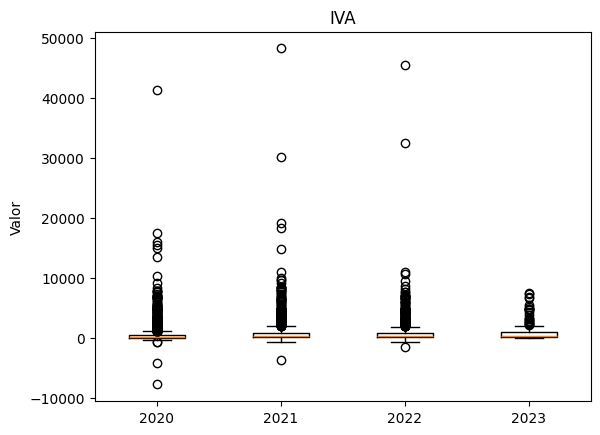

In [212]:
boxplots(new2020, new2021, new2022, new2023, 'IVA')

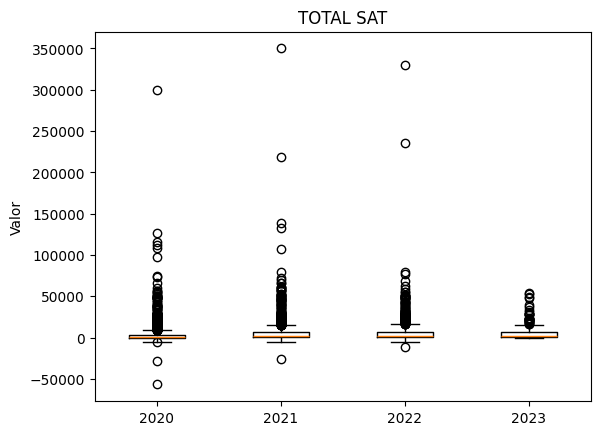

In [213]:
boxplots(new2020, new2021, new2022, new2023, 'TOTAL SAT')

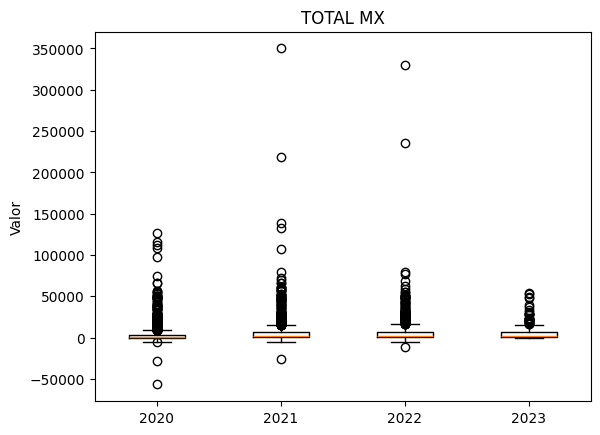

In [214]:
boxplots(new2020, new2021, new2022, new2023, 'TOTAL MX')

In [215]:
#creamos una funcion que genere los histogramas de cada dataframe de una columna dada
def histogramas(df,df2,df3,df4, columna):
    fig, ax = plt.subplots()
    ax.hist(df[columna], bins=10, alpha=0.5, label='2020')
    ax.hist(df2[columna], bins=10, alpha=0.5, label='2021')
    ax.hist(df3[columna], bins=10, alpha=0.5, label='2022')
    ax.hist(df4[columna], bins=10, alpha=0.5, label='2023')
    ax.set_title(columna)
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('Valor')
    ax.legend()
    plt.show()
    

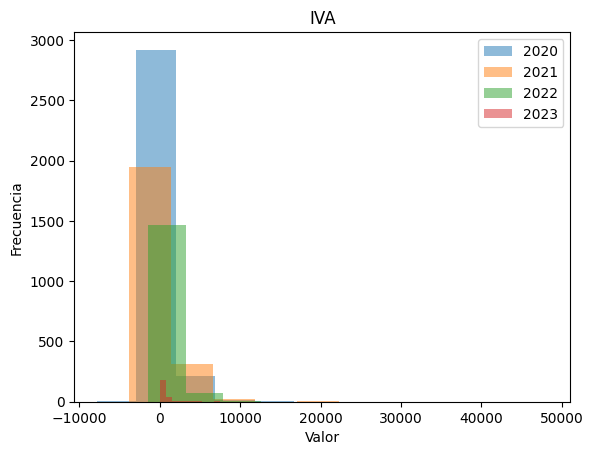

In [216]:
histogramas(new2020, new2021, new2022, new2023, 'IVA')

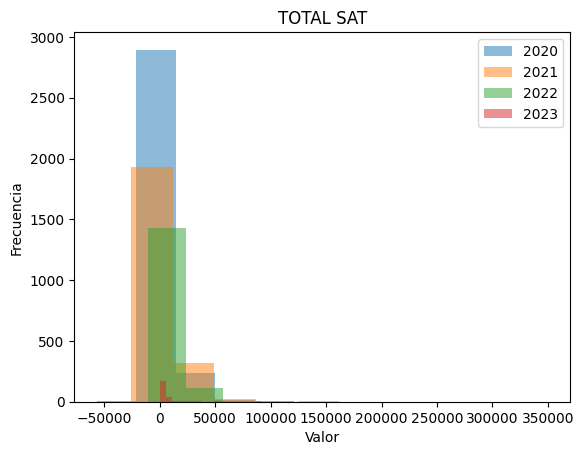

In [217]:
histogramas(new2020, new2021, new2022, new2023, 'TOTAL SAT')

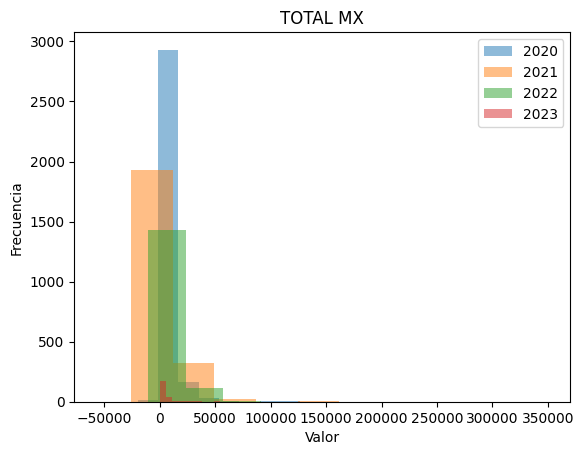

In [218]:
histogramas(new2020, new2021, new2022, new2023, 'TOTAL MX')

In [219]:
#generamos una funcion que regresa un nuevo dataframe sin valores atipicos de una columna dada
def quitar_atipicos(df, columna, df_name):
    q1 = df[columna].quantile(0.25)
    q3 = df[columna].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[columna] >= q1 - 1.5*iqr) & (df[columna] <= q3 + 1.5*iqr)]
    print('DataFrame name: ', df_name, 'Columna: ', columna)
    print('limite superior: ',  q3 + 1.5*iqr)
    print('limite inferior: ',  q1 - 1.5*iqr)
    return df


In [220]:
#generamos una funcion que regresa un nuevo dataframe sin valores atipicos de una columna dada con 2 veces la desviacion estandar
def quitar_atipicosstd(df, columna, df_name):
    std = df[columna].std()
    mean = df[columna].mean()
    df = df[(df[columna] >= mean - 2*std) & (df[columna] <= mean + 2*std)]
    print('DataFrame name: ', df_name, 'Columna: ', columna)
    print('limite superior: ',  mean + 2*std)
    print('limite inferior: ',  mean - 2*std)
    return df

In [221]:
new2020 = quitar_atipicos(new2020, 'IVA', '2020')
new2021 = quitar_atipicos(new2021, 'IVA', '2021')
new2022 = quitar_atipicos(new2022, 'IVA',  '2022')
new2023 = quitar_atipicos(new2023, 'IVA', '2023')

new2020 = quitar_atipicos(new2020, 'TOTAL SAT', '2020')
new2021 = quitar_atipicos(new2021, 'TOTAL SAT', '2021')
new2022 = quitar_atipicos(new2022, 'TOTAL SAT', '2022')
new2023 = quitar_atipicos(new2023, 'TOTAL SAT', '2023')

new2020 = quitar_atipicosstd(new2020, 'TOTAL MX', '2020')
new2021 = quitar_atipicosstd(new2021, 'TOTAL MX', '2021')
new2022 = quitar_atipicosstd(new2022, 'TOTAL MX', '2022')
new2023 = quitar_atipicosstd(new2023, 'TOTAL MX', '2023')




DataFrame name:  2020 Columna:  IVA
limite superior:  1024.2762500000001
limite inferior:  -595.17375
DataFrame name:  2021 Columna:  IVA
limite superior:  1964.705
limite inferior:  -1118.135
DataFrame name:  2022 Columna:  IVA
limite superior:  1851.1224999999997
limite inferior:  -1004.7374999999997
DataFrame name:  2023 Columna:  IVA
limite superior:  2124.61125
limite inferior:  -1195.33875
DataFrame name:  2020 Columna:  TOTAL SAT
limite superior:  4987.64125
limite inferior:  -2924.62875
DataFrame name:  2021 Columna:  TOTAL SAT
limite superior:  10845.625
limite inferior:  -5868.974999999999
DataFrame name:  2022 Columna:  TOTAL SAT
limite superior:  11836.18125
limite inferior:  -6141.70875
DataFrame name:  2023 Columna:  TOTAL SAT
limite superior:  12331.884999999998
limite inferior:  -6697.275
DataFrame name:  2020 Columna:  TOTAL MX
limite superior:  3451.132870284524
limite inferior:  -1674.2251379620982
DataFrame name:  2021 Columna:  TOTAL MX
limite superior:  8000.72970

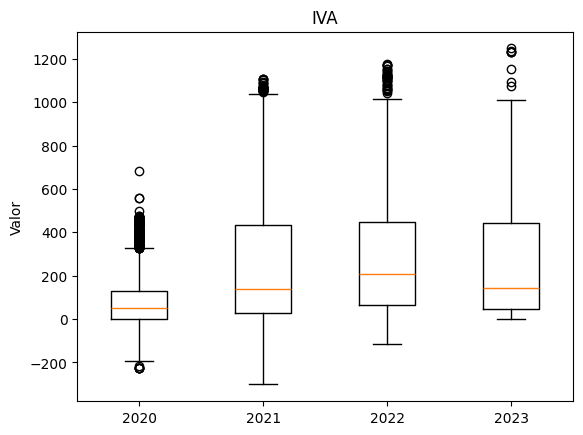

In [222]:
#creamos los boxplots para corroborar los cambios
boxplots(new2020, new2021, new2022, new2023, 'IVA')


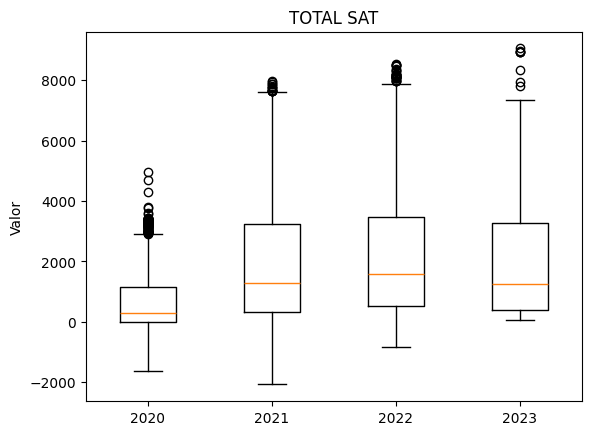

In [223]:
#creamos los boxplots para corroborar los cambios
boxplots(new2020, new2021, new2022, new2023, 'TOTAL SAT')

In [224]:
#Creamos una funcion que exporta todos estos dataframes a un archivo csv
def exportar_csv(df, df2, df3, df4):
    df.to_csv('2020_noatipicos.csv')
    df2.to_csv('2021_noatipicos.csv')
    df3.to_csv('2022_noatipicos.csv')
    df4.to_csv('2023_noatipicos.csv')


In [225]:
exportar_csv(new2020, new2021, new2022, new2023)